# Interstellar communications

Ridha Fathima Mohideen Malik, 15-03-2023

## Overview

Cocconi - Morrison (1959) theorised that an extra terrestrial intelligence (ETI) would choose the frquency of communication to be a universal "natural" frequency and proposed 21 cm line (1420 MhZ) as a candidate. Many Search for ETI (SETI) projects have been around this frequency. The choice of radio frequency for communication seems reasonable as higher wavelengths require more power and are prone to absorption by interstellar medium and planetary atmospheres. The radio window for Earth's atmosphere is between $10^7$ and $10^{12}$ Hz. But the 21 cm line has a heavy galactic background. In this notebook, we will explore other proposed universal frequencies (Drake - Sagan (1973), Morimoto et al (1978), Sivaram et al(2017)) and their implication on instrumentations for us and the communicating ETI.

Note: There are other theorised methods of interstellar communications like frequency modulation of spectra (Borra (2012)) and optical lasers (Clark - Cahoy (2018)). But for the purpose of this notebook, we are considering only direct signals in radio.

### References

- Cocconi and Morrison (1959), Searching for interstellar communications

- Drake and Sagan (1973), Interstellar radio communications and the frequency selection problem

- Morimoto, Hirabayashi and Jugaku (1978), Preferred frequency for interstellar communications

- Sivaram, Arun and Kiren (2017), Alternative standard frequencies for interstellar communication

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import astropy.constants as const

## Frequency selection

### Flux from source's star

We take the assumptions of Cocconi - Morrison (1959) that we are looking for a source around a quiet Sun-like star. This assumption is from the hypothesis that the activity of the host star should be minimal for a civilisation to survive long enough to possess technological capabilities.

For a star at a distance R, we get the flux F in a given frequency f:

$$ {F_{star}} = 10^{-15}\frac{f^2}{R^2} $$  


### Galactic background

We now have to model the background in radio and account for extinction

Cocconi - Morrison model isotropic galactic background as 

$$ F_{bg} = 10^{-12.5} \frac{c^2}{f^3 l_d^2} $$



$$ \frac{R}{l_d} = 10^{-10} f^{2.5}$$

### Limits

The closest star, $\alpha$-Centauri gives us an $R_{min} \approx 10^{16}$ m $\approx 4$ ly.

If we are only looking at galactic neighbourhood, $R_{max} \approx 10^{18}$ m $\approx 100$ ly.

Single dish radio telescopes like Arecibo and FAST have diameters of the order of 100s of meters. With radio arrays, we could reach up to an effective diameter of $10^4$ meters and with techniques like very long baseline interferometry, we could have a telescope the diameter of earth ($10^7$ meters). Besides the large diameter, interferometry is efficient in differentiating interference from Earth radio signals.

Thus we estimate,  $(\frac{R}{l_d})_{min} = 10^9$ and $(\frac{R}{l_d})_{max} = 10^{16}$.

In [4]:
schelling = pd.read_csv("schelling_points.txt", sep =r"\t+|\s+", engine="python")
schelling

,#source,freq(MHz),authors
0,H1,1420.000,cocconi-morrison+59
1,pi*H1,4462.336,blair+92
2,OH,1667.000,seti?
3,H2CO,4830.000,morimoto+78
4,universal_constants,2556.800,sivaram+17
5,planck_comb,190.887,wright+20
6,He3+,8666.565,bania-hood+91


In [5]:
schelling["R/l_d"] = 10**-10 * (schelling["freq(MHz)"] * 10**6)**2.5
schelling

,#source,freq(MHz),authors,R/l_d
0,H1,1420.000,cocconi-morrison+59,7.598377e+12
1,pi*H1,4462.336,blair+92,1.330165e+14
2,OH,1667.000,seti?,1.134590e+13
3,H2CO,4830.000,morimoto+78,1.621317e+14
4,universal_constants,2556.800,sivaram+17,3.305536e+13
5,planck_comb,190.887,wright+20,5.034321e+10
6,He3+,8666.565,bania-hood+91,6.992259e+14


$(\frac{R}{l_d})$ obtained for the frequencies are within current human capacities.

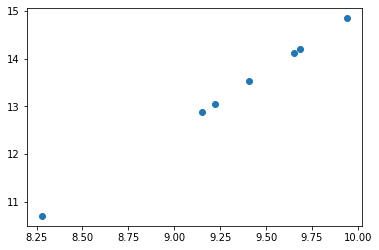

In [24]:
plt.scatter(np.log10(schelling["freq(MHz)"] * 10**6), np.log10(schelling["R/l_d"]))

## Power demands at source

In [15]:
c = 3*10**8

Text(0, 0.5, 'log Galactic background power(W/Hz)')

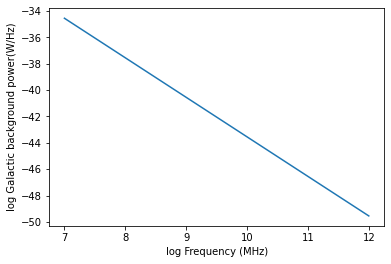

In [14]:
#ld = np.linspace(10**2, 10**7, 1000)
f = np.linspace(10**7, 10**12, 1000)

#for f in schelling["freq(MHz)"]:
#    F = 10**-12.5 * (3*10**8)**2 * ld**2/ ((f*10**6)**3 * ld**2)

#    plt.plot(np.log10(ld), np.log10(F), label=str(f)+" MHz")

F = 10**-12.5 * (c)**2 / ((f*10**6)**3)
plt.plot(np.log10(f), np.log10(F))

#plt.xlabel("Detector diameter (m)")
plt.xlabel("log Frequency (MHz)")
plt.ylabel("log Galactic background power(W/Hz)")

#plt.legend()

Power required at source, Power = Flux x Area

$$ \frac{dW}{df} = 10^{-12.5} \frac{c^5}{f^6} \frac{R^2}{l_d^2} \frac{1}{l_s^2} $$



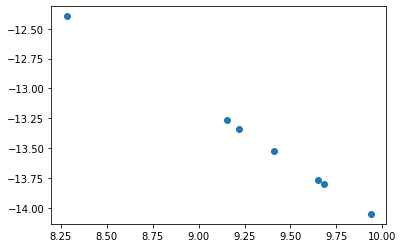

In [28]:
ls = 10**7

R_ld = np.linspace(10**9, 10**16, 1000)
power = 10**-12.5 * c**5 * schelling["R/l_d"]**2 / (ls**2 * (schelling["freq(MHz)"]* 10**6)**6)

plt.scatter(np.log10(schelling["freq(MHz)"]* 10**6), np.log10(power))

## Summary